In [123]:
from utilities import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import reproject
import radio_beam
import os
from astropy.convolution import convolve
from astropy.io import fits
from astropy.wcs import WCS

source='DSVI'
fnum=fields[source]
central_pix=pixdict[source]
c2h5oh_sourcelocs={'DSi':'/oct2024_1_removesDS2exclusions/','DSii':'/oct2024_1_removeproblemlines/',
                   'DSiii':'/dec2024_3_try-close-to-FWZI/','DSiv':'/nov2024_1_firstrun_removesDS2exclusions/',
                   'DSVI':'/nov2024_1_removesDS2exclusions/'}
ch3oh_datadir=f'/blue/adamginsburg/d.jeff/imaging_results/SgrB2DS-CH3OH/sep2023revolution/'#SgrB2S lives in the pacman_sep2023revolution folder, if we ever get to it
c2h5oh_datadir=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/C2H5OH/{source}'+c2h5oh_sourcelocs[source]
ch3oh_datadir=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/CH3OH/{source}/{ch3oh_sourcedict[source]}'

In [124]:
path_nh2=ch3oh_datadir+'bootstrap_nh2map_3sigma_bolocamfeather_smoothedtobolocam.fits'
path_error_nh2=ch3oh_datadir+'bootstrap_nh2map_error_bolocamfeather_smoothedtobolocam.fits'

path_nc2h5oh=c2h5oh_datadir+'ntotmap_allspw_withnans_weighted_useintercept_3sigma.fits'
path_error_nc2h5oh=c2h5oh_datadir+'ntoterrmap_allspw_withnans_weighted_useintercept.fits'

path_nch3oh=ch3oh_datadir+'bootstrap_ntot_intstd_boostrap1000_nonegativeslope.fits'
path_error_nch3oh=ch3oh_datadir+'ntoterrmap_allspw_withnans_weighted_useintercept.fits'

In [125]:
hdu_nh2=fits.open(path_nh2)
beam_nh2=radio_beam.Beam.from_fits_header(hdu_nh2[0].header)
data_nh2=hdu_nh2[0].data
error_nh2=fits.getdata(path_error_nh2)

hdu_nc2h5oh=fits.open(path_nc2h5oh)
beam_nc2h5oh=radio_beam.Beam.from_fits_header(hdu_nc2h5oh[0].header)
data_nc2h5oh=hdu_nc2h5oh[0].data

hdu_error_nc2h5oh=fits.open(path_error_nc2h5oh)
beam_error_nc2h5oh=radio_beam.Beam.from_fits_header(hdu_error_nc2h5oh[0].header)
error_nc2h5oh=hdu_error_nc2h5oh[0].data

beam_deconv=beam_nh2.deconvolve(beam_nc2h5oh)
pixscale=WCS(hdu_nc2h5oh[0].header).proj_plane_pixel_area()**0.5
okmask=np.isfinite(data_nc2h5oh)*np.isfinite(data_nh2)

smoothed_nc2h5oh = convolve(data_nc2h5oh, beam_deconv.as_kernel(pixscale),nan_treatment='interpolate')
okmasknc2h5oh=np.ma.masked_where(okmask==False,smoothed_nc2h5oh)
ok_smoothed_nc2h5oh=okmasknc2h5oh.filled(fill_value=np.nan)

preconvolve_ok_error_nc2h5oh=okmask*error_nc2h5oh

smoothed_error_nc2h5oh = convolve(preconvolve_ok_error_nc2h5oh, beam_deconv.as_kernel(pixscale),nan_treatment='interpolate')#,mask=okmask,preserve_nan=True)
okmaskerrornc2h5oh=np.ma.masked_where(okmask==False,smoothed_error_nc2h5oh)
ok_smoothed_error_nc2h5oh=okmaskerrornc2h5oh.filled(fill_value=np.nan)

xc2h5oh=ok_smoothed_nc2h5oh/data_nh2

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


7.44418287787002e+17

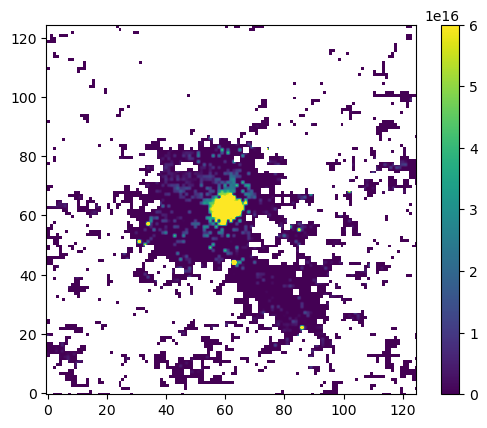

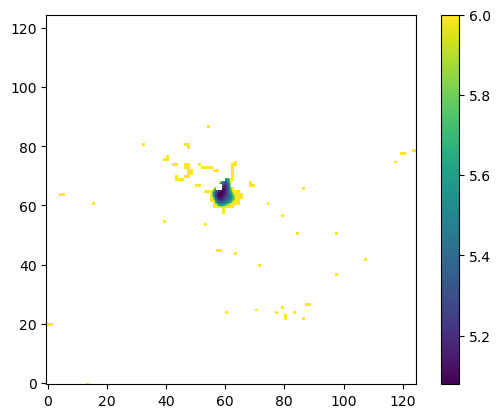

"\nplt.imshow(xc2h5oh,origin='lower',norm=mpl.colors.LogNorm(vmin=5e-8,vmax=2.5e-7))\nplt.colorbar()\nplt.show()\nplt.imshow(data_nh2,origin='lower',vmax=1.75e24)\nplt.colorbar()\nplt.show()\n"

In [136]:
plt.imshow(preconvolve_ok_error_nc2h5oh,origin='lower',vmax=6e16)
plt.colorbar()
plt.show()
plt.imshow((ok_smoothed_nc2h5oh/ok_smoothed_error_nc2h5oh),origin='lower',vmax=6)
plt.colorbar()
plt.show()
'''
plt.imshow(xc2h5oh,origin='lower',norm=mpl.colors.LogNorm(vmin=5e-8,vmax=2.5e-7))
plt.colorbar()
plt.show()
plt.imshow(data_nh2,origin='lower',vmax=1.75e24)
plt.colorbar()
plt.show()
'''

In [31]:
ok_smoothed_nc2h5oh

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.13025101e+15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.95986915e+14]])